In [84]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_wine
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
import plotly.express as px
import matplotlib.pyplot as plt

In [85]:
dataset = pd.read_csv('modified_dataset.csv')

In [86]:
dataset.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,dummy
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,NaN
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,NaN
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,NaN


In [87]:
dataset.isnull().sum()

Unnamed: 0                     0
trans_date_trans_time          0
cc_num                         0
merchant                       0
category                       0
amt                         1343
first                          0
last                           0
gender                         0
street                         0
city                           0
state                          0
zip                            0
lat                            0
long                           0
city_pop                       0
job                            0
dob                            0
trans_num                      0
unix_time                      0
merch_lat                      0
merch_long                     0
is_fraud                       0
dummy                    1295397
dtype: int64

In [88]:
dataset = dataset.drop(['dummy'],axis=1) #Axis = 1 means column removed

In [89]:
dataset.isnull().sum()

Unnamed: 0                  0
trans_date_trans_time       0
cc_num                      0
merchant                    0
category                    0
amt                      1343
first                       0
last                        0
gender                      0
street                      0
city                        0
state                       0
zip                         0
lat                         0
long                        0
city_pop                    0
job                         0
dob                         0
trans_num                   0
unix_time                   0
merch_lat                   0
merch_long                  0
is_fraud                    0
dtype: int64

In [90]:
dataset = dataset[dataset['amt'].notnull()]

In [91]:
dataset.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [92]:
dataset.is_fraud.sum()

7504

In [93]:
dataset.keys() #merchant, category, first, last, gender, street, city, state, job

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [94]:
# merchant encoding
enc = LabelEncoder()
# Apply the encoding to the "Accessible" column
dataset['merchant_enc'] = enc.fit_transform(dataset['merchant'])
# Compare the two columns
dataset[['merchant','merchant_enc']]

,merchant,merchant_enc
0,"fraud_Rippin, Kub and Mann",514
1,"fraud_Heller, Gutmann and Zieme",241
2,fraud_Lind-Buckridge,390
3,"fraud_Kutch, Hermiston and Farrell",360
4,fraud_Keeling-Crist,297
...,...,...
1296670,fraud_Reichel Inc,499
1296671,fraud_Abernathy and Sons,2
1296672,fraud_Stiedemann Ltd,599
1296673,"fraud_Reinger, Weissnat and Strosin",509


In [95]:
# category encoding
enc = LabelEncoder()
# Apply the encoding to the "Accessible" column
dataset['category_enc'] = enc.fit_transform(dataset['category'])
# Compare the two columns
dataset[['category','category_enc']]

,category,category_enc
0,misc_net,8
1,grocery_pos,4
2,entertainment,0
3,gas_transport,2
4,misc_pos,9
...,...,...
1296670,entertainment,0
1296671,food_dining,1
1296672,food_dining,1
1296673,food_dining,1


In [96]:
# first encoding
enc = LabelEncoder()
# Apply the encoding to the "Accessible" column
dataset['first_enc'] = enc.fit_transform(dataset['first'])
# Compare the two columns
dataset[['first','first_enc']]

,first,first_enc
0,Jennifer,162
1,Stephanie,309
2,Edward,115
3,Jeremy,163
4,Tyler,336
...,...,...
1296670,Erik,121
1296671,Jeffrey,160
1296672,Christopher,74
1296673,Joseph,179


In [97]:
# last encoding
enc = LabelEncoder()
# Apply the encoding to the "Accessible" column
dataset['last_enc'] = enc.fit_transform(dataset['last'])
# Compare the two columns
dataset[['last','last_enc']]

,last,last_enc
0,Banks,18
1,Gill,157
2,Sanchez,381
3,White,463
4,Garcia,149
...,...,...
1296670,Patterson,332
1296671,White,463
1296672,Castaneda,67
1296673,Murray,304


In [98]:
# gender encoding
enc = LabelEncoder()
# Apply the encoding to the "Accessible" column
dataset['gender_enc'] = enc.fit_transform(dataset['gender'])
# Compare the two columns
dataset[['gender','gender_enc']]

,gender,gender_enc
0,F,0
1,F,0
2,M,1
3,M,1
4,M,1
...,...,...
1296670,M,1
1296671,M,1
1296672,M,1
1296673,M,1


In [99]:
# street encoding
enc = LabelEncoder()
# Apply the encoding to the "Accessible" column
dataset['street_enc'] = enc.fit_transform(dataset['street'])
# Compare the two columns
dataset[['street','street_enc']]

,street,street_enc
0,561 Perry Cove,568
1,43039 Riley Greens Suite 393,435
2,594 White Dale Suite 530,602
3,9443 Cynthia Court Apt. 038,930
4,408 Bradley Rest,418
...,...,...
1296670,162 Jessica Row Apt. 072,154
1296671,8617 Holmes Terrace Suite 651,856
1296672,1632 Cohen Drive Suite 639,158
1296673,42933 Ryan Underpass,433


In [100]:
# city encoding
enc = LabelEncoder()
# Apply the encoding to the "Accessible" column
dataset['city_enc'] = enc.fit_transform(dataset['city'])
# Compare the two columns
dataset[['city','city_enc']]

,city,city_enc
0,Moravian Falls,526
1,Orient,612
2,Malad City,468
3,Boulder,84
4,Doe Hill,216
...,...,...
1296670,Hatch,330
1296671,Tuscarora,813
1296672,High Rolls Mountain Park,346
1296673,Manderson,471


In [101]:
# state encoding
enc = LabelEncoder()
# Apply the encoding to the "Accessible" column
dataset['state_enc'] = enc.fit_transform(dataset['state'])
# Compare the two columns
dataset[['state','state_enc']]

,state,state_enc
0,NC,27
1,WA,47
2,ID,13
3,MT,26
4,VA,45
...,...,...
1296670,UT,44
1296671,MD,20
1296672,NM,32
1296673,SD,41


In [102]:
# job encoding
enc = LabelEncoder()
# Apply the encoding to the "Accessible" column
dataset['job_enc'] = enc.fit_transform(dataset['job'])
# Compare the two columns
dataset[['job','job_enc']]

,job,job_enc
0,"Psychologist, counselling",370
1,Special educational needs teacher,428
2,Nature conservation officer,307
3,Patent attorney,328
4,Dance movement psychotherapist,116
...,...,...
1296670,Geoscientist,215
1296671,"Production assistant, television",360
1296672,Naval architect,308
1296673,Volunteer coordinator,485


In [103]:
dataset['trans_date_trans_time'] = pd.to_datetime(dataset['trans_date_trans_time'])

# Extract the month using the .dt accessor
dataset['Month'] = dataset['trans_date_trans_time'].dt.month

In [104]:
dataset.keys()

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'merchant_enc', 'category_enc',
       'first_enc', 'last_enc', 'gender_enc', 'street_enc', 'city_enc',
       'state_enc', 'job_enc', 'Month'],
      dtype='object')

In [105]:
encoded_dataset = dataset[['cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'merchant_enc', 'category_enc',
       'first_enc', 'last_enc', 'gender_enc', 'street_enc', 'city_enc', 'state_enc', 'job_enc', 'Month']]

In [106]:
dcorr = encoded_dataset.corr()
dcorr

C:\Users\AYON ROY\AppData\Local\Temp\ipykernel_2844\176387756.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dcorr = encoded_dataset.corr()


,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,merchant_enc,category_enc,first_enc,last_enc,gender_enc,street_enc,city_enc,state_enc,job_enc,Month
cc_num,1.000000,0.001771,0.041445,-0.059244,-0.048288,-0.008994,0.000334,-0.058916,-0.048260,-0.000975,0.000029,0.001223,-0.027205,0.006893,0.001115,0.046510,0.049192,-0.036371,0.029184,-0.000346
amt,0.001771,1.000000,0.001839,-0.001906,-0.000180,0.005791,-0.000269,-0.001856,-0.000144,0.219351,-0.002643,0.030911,-0.003554,-0.004707,0.001017,0.001364,-0.000568,0.001745,-0.000626,-0.001730
zip,0.041445,0.001839,1.000000,-0.114296,-0.909728,0.078442,0.000641,-0.113567,-0.908919,-0.002159,0.001135,0.002369,0.004754,0.028297,-0.065961,-0.053873,0.074738,-0.116267,-0.005676,0.000827
lat,-0.059244,-0.001906,-0.114296,1.000000,-0.015577,-0.155715,0.000619,0.993593,-0.015553,0.001903,-0.002269,-0.008626,0.131902,-0.034879,0.042899,-0.012586,-0.031993,0.213223,-0.027629,-0.001098
long,-0.048288,-0.000180,-0.909728,-0.015577,1.000000,-0.052688,-0.000613,-0.015495,0.999120,0.001724,-0.000694,-0.000756,-0.016481,-0.025551,0.050390,0.071323,-0.066698,0.132470,-0.002717,-0.001190
city_pop,-0.008994,0.005791,0.078442,-0.155715,-0.052688,1.000000,-0.001703,-0.154768,-0.052660,0.002140,0.001926,0.009369,-0.066624,-0.012060,-0.028651,-0.012540,0.034887,-0.012183,-0.054978,0.000152
unix_time,0.000334,-0.000269,0.000641,0.000619,-0.000613,-0.001703,1.000000,0.000549,-0.000606,-0.005054,-0.000996,0.000217,0.000474,0.000052,-0.001009,-0.001084,-0.000460,0.001054,0.000041,0.184888
merch_lat,-0.058916,-0.001856,-0.113567,0.993593,-0.015495,-0.154768,0.000549,1.000000,-0.015475,0.001748,-0.002265,-0.008492,0.130997,-0.034512,0.042607,-0.012453,-0.031781,0.211793,-0.027449,-0.001140
merch_long,-0.048260,-0.000144,-0.908919,-0.015553,0.999120,-0.052660,-0.000606,-0.015475,1.000000,0.001724,-0.000673,-0.000725,-0.016494,-0.025551,0.050339,0.071282,-0.066713,0.132349,-0.002715,-0.001173
is_fraud,-0.000975,0.219351,-0.002159,0.001903,0.001724,0.002140,-0.005054,0.001748,0.001724,1.000000,-0.000519,0.020195,-0.003198,-0.000096,0.007628,0.001466,-0.002095,0.001759,-0.000092,-0.012399


<Axes: >

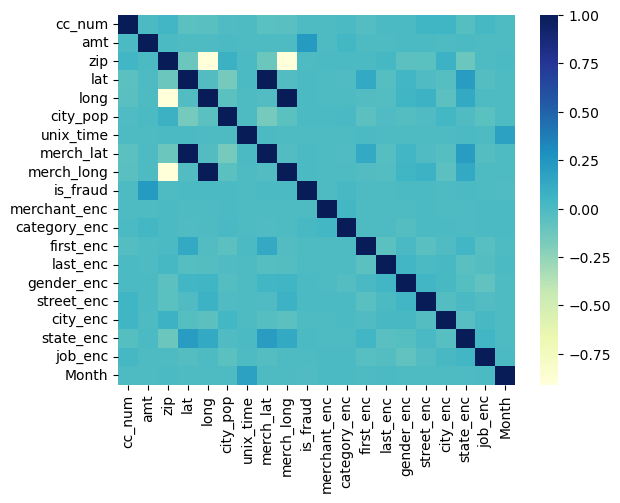

In [107]:
sns.heatmap(dcorr, cmap = 'YlGnBu')

In [108]:
# Removing zip, long, merch_long Colomns 
encoded_dataset2 = dataset[['cc_num', 'amt', 'lat', 'city_pop', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'is_fraud', 'merchant_enc', 'category_enc',
       'first_enc', 'last_enc', 'gender_enc', 'street_enc', 'city_enc', 'state_enc', 'job_enc', 'Month']]

In [109]:
dcorr2 = encoded_dataset2.corr()
dcorr2

C:\Users\AYON ROY\AppData\Local\Temp\ipykernel_2844\1041761430.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dcorr2 = encoded_dataset2.corr()


,cc_num,amt,lat,city_pop,unix_time,merch_lat,is_fraud,merchant_enc,category_enc,first_enc,last_enc,gender_enc,street_enc,city_enc,state_enc,job_enc,Month
cc_num,1.000000,0.001771,-0.059244,-0.008994,0.000334,-0.058916,-0.000975,0.000029,0.001223,-0.027205,0.006893,0.001115,0.046510,0.049192,-0.036371,0.029184,-0.000346
amt,0.001771,1.000000,-0.001906,0.005791,-0.000269,-0.001856,0.219351,-0.002643,0.030911,-0.003554,-0.004707,0.001017,0.001364,-0.000568,0.001745,-0.000626,-0.001730
lat,-0.059244,-0.001906,1.000000,-0.155715,0.000619,0.993593,0.001903,-0.002269,-0.008626,0.131902,-0.034879,0.042899,-0.012586,-0.031993,0.213223,-0.027629,-0.001098
city_pop,-0.008994,0.005791,-0.155715,1.000000,-0.001703,-0.154768,0.002140,0.001926,0.009369,-0.066624,-0.012060,-0.028651,-0.012540,0.034887,-0.012183,-0.054978,0.000152
unix_time,0.000334,-0.000269,0.000619,-0.001703,1.000000,0.000549,-0.005054,-0.000996,0.000217,0.000474,0.000052,-0.001009,-0.001084,-0.000460,0.001054,0.000041,0.184888
merch_lat,-0.058916,-0.001856,0.993593,-0.154768,0.000549,1.000000,0.001748,-0.002265,-0.008492,0.130997,-0.034512,0.042607,-0.012453,-0.031781,0.211793,-0.027449,-0.001140
is_fraud,-0.000975,0.219351,0.001903,0.002140,-0.005054,0.001748,1.000000,-0.000519,0.020195,-0.003198,-0.000096,0.007628,0.001466,-0.002095,0.001759,-0.000092,-0.012399
merchant_enc,0.000029,-0.002643,-0.002269,0.001926,-0.000996,-0.002265,-0.000519,1.000000,0.032309,-0.001511,-0.000496,-0.000847,0.000732,-0.000260,-0.000400,0.001298,0.000465
category_enc,0.001223,0.030911,-0.008626,0.009369,0.000217,-0.008492,0.020195,0.032309,1.000000,-0.001914,-0.004333,-0.028280,0.002271,0.000781,0.000226,0.003509,0.000772
first_enc,-0.027205,-0.003554,0.131902,-0.066624,0.000474,0.130997,-0.003198,-0.001511,-0.001914,1.000000,-0.056983,0.015206,-0.045318,-0.009201,0.043178,-0.039707,0.000162


<Axes: >

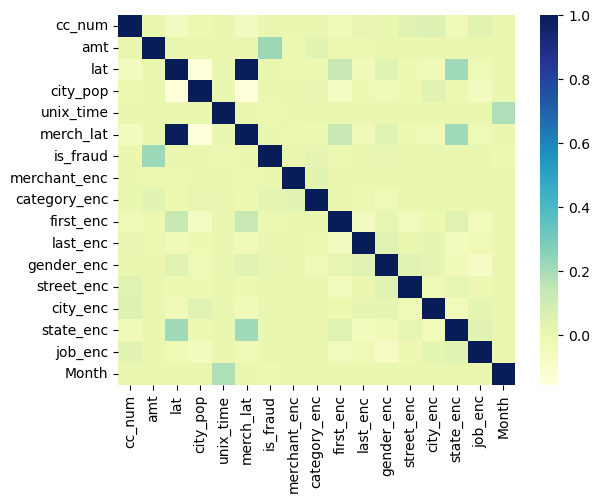

In [110]:
sns.heatmap(dcorr2, cmap = 'YlGnBu')

In [111]:
# Removing marchant_lat
encoded_dataset3 = dataset[['cc_num', 'amt', 'lat', 'city_pop', 'unix_time', 'is_fraud', 'merchant_enc',
                            'category_enc', 'first_enc', 'last_enc', 'gender_enc', 'street_enc', 'city_enc', 'state_enc',
                            'job_enc', 'Month']]

In [112]:
dcorr3 = encoded_dataset3.corr()
dcorr3

,cc_num,amt,lat,city_pop,unix_time,is_fraud,merchant_enc,category_enc,first_enc,last_enc,gender_enc,street_enc,city_enc,state_enc,job_enc,Month
cc_num,1.000000,0.001771,-0.059244,-0.008994,0.000334,-0.000975,0.000029,0.001223,-0.027205,0.006893,0.001115,0.046510,0.049192,-0.036371,0.029184,-0.000346
amt,0.001771,1.000000,-0.001906,0.005791,-0.000269,0.219351,-0.002643,0.030911,-0.003554,-0.004707,0.001017,0.001364,-0.000568,0.001745,-0.000626,-0.001730
lat,-0.059244,-0.001906,1.000000,-0.155715,0.000619,0.001903,-0.002269,-0.008626,0.131902,-0.034879,0.042899,-0.012586,-0.031993,0.213223,-0.027629,-0.001098
city_pop,-0.008994,0.005791,-0.155715,1.000000,-0.001703,0.002140,0.001926,0.009369,-0.066624,-0.012060,-0.028651,-0.012540,0.034887,-0.012183,-0.054978,0.000152
unix_time,0.000334,-0.000269,0.000619,-0.001703,1.000000,-0.005054,-0.000996,0.000217,0.000474,0.000052,-0.001009,-0.001084,-0.000460,0.001054,0.000041,0.184888
is_fraud,-0.000975,0.219351,0.001903,0.002140,-0.005054,1.000000,-0.000519,0.020195,-0.003198,-0.000096,0.007628,0.001466,-0.002095,0.001759,-0.000092,-0.012399
merchant_enc,0.000029,-0.002643,-0.002269,0.001926,-0.000996,-0.000519,1.000000,0.032309,-0.001511,-0.000496,-0.000847,0.000732,-0.000260,-0.000400,0.001298,0.000465
category_enc,0.001223,0.030911,-0.008626,0.009369,0.000217,0.020195,0.032309,1.000000,-0.001914,-0.004333,-0.028280,0.002271,0.000781,0.000226,0.003509,0.000772
first_enc,-0.027205,-0.003554,0.131902,-0.066624,0.000474,-0.003198,-0.001511,-0.001914,1.000000,-0.056983,0.015206,-0.045318,-0.009201,0.043178,-0.039707,0.000162
last_enc,0.006893,-0.004707,-0.034879,-0.012060,0.000052,-0.000096,-0.000496,-0.004333,-0.056983,1.000000,0.043786,0.005600,0.017578,-0.048166,-0.024598,0.001147


<Axes: >

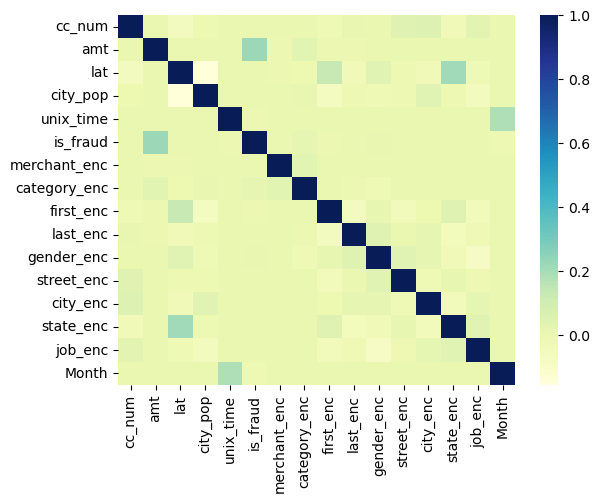

In [113]:
sns.heatmap(dcorr3, cmap = 'YlGnBu')

In [114]:
X_train, X_test, y_train, y_test = train_test_split(dataset[['cc_num', 'amt', 'lat', 'city_pop', 'unix_time', 'merchant_enc',
                            'category_enc', 'first_enc', 'last_enc', 'gender_enc', 'street_enc', 'city_enc', 'state_enc',
                            'job_enc', 'Month']], dataset['is_fraud'], test_size=0.25, random_state=0)

In [115]:
X_train

,cc_num,amt,lat,city_pop,unix_time,merchant_enc,category_enc,first_enc,last_enc,gender_enc,street_enc,city_enc,state_enc,job_enc,Month
209823,4958589671582726883,6.03,38.7894,43102,1334638980,72,11,0,335,1,797,111,45,221,4
1142801,6597888193422452,82.98,33.6751,2317,1366511381,272,2,37,237,1,481,352,43,79,4
163138,370348764075623,78.38,30.5668,8512,1332867380,322,6,74,160,1,937,800,18,3,3
788885,36485887555770,124.38,40.4971,267,1354393635,311,11,243,170,1,222,276,35,189,12
139550,6011399591920186,90.97,42.1001,2121,1331977602,239,4,226,377,0,591,743,19,385,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360151,5456776410929288,50.46,41.0472,139,1339879741,343,10,322,227,0,657,587,38,328,6
152458,4400011257587661852,109.84,41.4972,509,1332494620,196,4,228,345,0,483,584,29,311,3
964402,38544312728630,90.74,26.3771,51427,1359038158,276,5,339,50,0,85,82,9,86,1
118064,3551217896304745,67.99,44.2320,6120,1331159992,538,0,292,178,0,603,811,34,70,3


In [116]:
X_test

,cc_num,amt,lat,city_pop,unix_time,merchant_enc,category_enc,first_enc,last_enc,gender_enc,street_enc,city_enc,state_enc,job_enc,Month
1153526,3558881852140592,10.43,35.2563,759,1366979979,581,6,74,196,1,53,628,3,212,4
963804,6011438889172900,180.97,34.2853,5161,1358997498,521,9,8,5,0,417,203,2,147,1
683320,30042378430132,1.45,40.9051,21902,1350603223,98,1,80,165,1,64,589,34,471,10
45071,213156747557083,66.27,34.1556,172817,1327696019,362,6,1,385,1,722,290,4,12,1
453021,4476840372112,15.15,34.6689,3395,1342786684,190,0,311,448,1,322,890,1,140,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063344,4607072969078276,87.88,35.8985,1493,1363498483,55,2,44,337,0,29,179,36,23,3
1031066,3553629419254918,95.27,48.3400,85,1362282564,468,4,298,217,0,717,171,47,390,3
686091,4446368897795790,31.15,37.9073,741,1350692732,136,9,286,221,1,878,38,45,212,10
858733,4173950183554608,2.11,40.3330,3279,1355694498,221,13,310,258,1,477,519,31,219,12


In [117]:
y_train

209823     0
1142801    0
163138     0
788885     0
139550     0
          ..
360151     0
152458     0
964402     0
118064     0
306016     0
Name: is_fraud, Length: 971499, dtype: int64

In [118]:
y_test.shape

(323833,)

In [119]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_MinMaxscaled = scaler.transform(X_train)
X_train_MinMaxscaled

array([[9.93238304e-01, 1.73760445e-04, 4.02053306e-01, ...,
        9.00000000e-01, 4.48275862e-01, 2.72727273e-01],
       [1.32158855e-03, 2.83198436e-03, 2.92460067e-01, ...,
        8.60000000e-01, 1.60243408e-01, 2.72727273e-01],
       [7.41712058e-05, 2.67307819e-03, 2.25852973e-01, ...,
        3.60000000e-01, 6.08519270e-03, 1.81818182e-01],
       ...,
       [7.70857908e-06, 3.10005216e-03, 1.36072789e-01, ...,
        1.80000000e-01, 1.74442191e-01, 0.00000000e+00],
       [7.11320337e-04, 2.31415750e-03, 5.18681615e-01, ...,
        6.80000000e-01, 1.41987830e-01, 1.81818182e-01],
       [8.96224731e-04, 4.11083360e-05, 3.80365232e-01, ...,
        8.00000000e-02, 4.46247465e-01, 3.63636364e-01]])

In [120]:
scaler = MinMaxScaler()
scaler.fit(X_test)
X_test_MinMaxscaled = scaler.transform(X_test)
X_test_MinMaxscaled

array([[7.12855478e-04, 5.26926326e-04, 3.26343263e-01, ...,
        6.00000000e-02, 4.30020284e-01, 2.72727273e-01],
       [1.20411888e-03, 1.00563023e-02, 3.05535913e-01, ...,
        4.00000000e-02, 2.98174442e-01, 0.00000000e+00],
       [6.00558539e-06, 2.51449466e-05, 4.47390188e-01, ...,
        6.80000000e-01, 9.55375254e-01, 8.18181818e-01],
       ...,
       [8.90625005e-04, 1.68471143e-03, 3.83150974e-01, ...,
        9.00000000e-01, 4.30020284e-01, 8.18181818e-01],
       [8.36057734e-04, 6.20242017e-05, 4.35130780e-01, ...,
        6.20000000e-01, 4.44219067e-01, 1.00000000e+00],
       [9.27297755e-04, 7.62730048e-04, 2.33884482e-01, ...,
        2.00000000e-01, 9.18864097e-01, 4.54545455e-01]])

In [121]:
X_test_MinMaxscaled.shape

(323833, 15)

In [122]:
y_train

209823     0
1142801    0
163138     0
788885     0
139550     0
          ..
360151     0
152458     0
964402     0
118064     0
306016     0
Name: is_fraud, Length: 971499, dtype: int64

In [123]:
scaler2 = StandardScaler()
scaler2.fit(X_train)
X_train_Standardscaled = scaler.transform(X_train)
X_train_Standardscaled

array([[9.93238304e-01, 2.81064626e-04, 4.02053306e-01, ...,
        9.00000000e-01, 4.48275862e-01, 2.72727273e-01],
       [1.32158855e-03, 4.58085050e-03, 2.92460067e-01, ...,
        8.60000000e-01, 1.60243408e-01, 2.72727273e-01],
       [7.41712058e-05, 4.32381327e-03, 2.25852973e-01, ...,
        3.60000000e-01, 6.08519270e-03, 1.81818182e-01],
       ...,
       [7.70857908e-06, 5.01446114e-03, 1.36072789e-01, ...,
        1.80000000e-01, 1.74442191e-01, 0.00000000e+00],
       [7.11320337e-04, 3.74324439e-03, 5.18681615e-01, ...,
        6.80000000e-01, 1.41987830e-01, 1.81818182e-01],
       [8.96224731e-04, 6.64944145e-05, 3.80365232e-01, ...,
        8.00000000e-02, 4.46247465e-01, 3.63636364e-01]])

# KNN

In [124]:
knn=KNeighborsClassifier()
knn.fit(X_train_MinMaxscaled, y_train)

KNeighborsClassifier()

In [125]:
y_pred = knn.predict(X_test_MinMaxscaled)

In [126]:
count = 0
for i in range(len(y_test)):
    if y_pred[i] != y_test.iloc[i]: 
        count = count + 1
error = count/len(y_pred)
print( "Error = %f " % (error*100) + '%' )
knn_accuracy_withoutUndersample = (1-error)
print( "Accuracy = %f " % (knn_accuracy_withoutUndersample*100) + '%' )

Error = 0.588884 %
Accuracy = 99.411116 %


In [127]:
# Visual

# pd.plotting.scatter_matrix(dataset, c=dataset.is_fraud, figsize=(100, 100),
#                            marker='o', hist_kwds={'bins': 20}, s=20,
#                            alpha=.8)

In [128]:
knn_cm = confusion_matrix(y_test, y_pred)
print(knn_cm)

[[321819    130]
 [  1777    107]]


<Axes: >

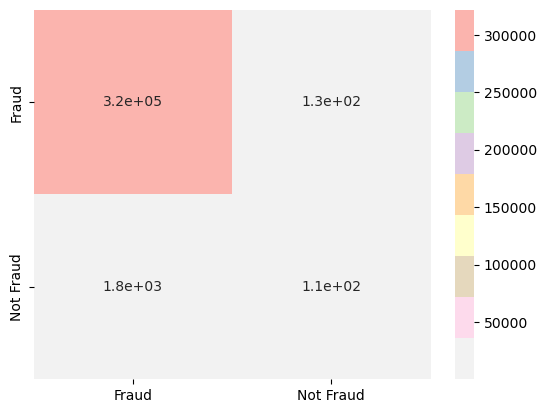

In [129]:
sns.heatmap(knn_cm, annot=True, cmap='Pastel1_r', xticklabels=['Fraud' ,'Not Fraud'],yticklabels=['Fraud' ,'Not Fraud'])
# Column Actual val, Row Predicted val

# Logistic Regression

In [130]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_MinMaxscaled,y_train)

LogisticRegression()

In [137]:
y_pred = logistic_regression.predict(X_test_MinMaxscaled)

In [138]:
count = 0
for i in range( len(y_test) ):
    if y_pred[i] != y_test.iloc[i]: 
        count = count + 1
error = count/len(y_pred)
print( "Error = %f " % (error*100) + '%' )
lr_accuracy_withoutundersample = (1-error)
print( "Accuracy = %f " % (lr_accuracy_withoutundersample*100) + '%' )

Error = 0.626558 %
Accuracy = 99.373442 %


In [139]:
logistic_regression_cm = confusion_matrix(y_test, y_pred)
print(logistic_regression_cm)

[[321804    145]
 [  1884      0]]


<Axes: >

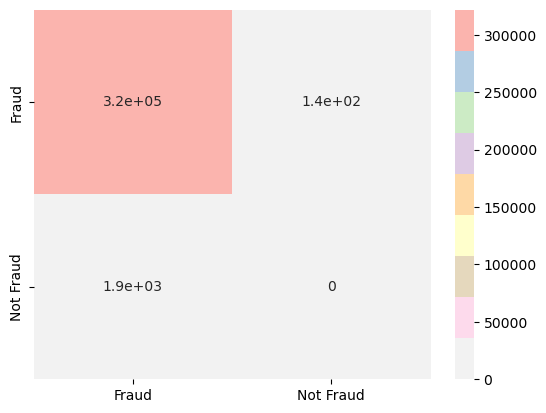

In [140]:
sns.heatmap(logistic_regression_cm, annot=True, cmap='Pastel1_r', xticklabels=['Fraud' ,'Not Fraud'],yticklabels=['Fraud' ,'Not Fraud'])

# Naive Bayes

In [141]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train_MinMaxscaled, y_train)

GaussianNB()

In [142]:
y_pred = naive_bayes.predict(X_test_MinMaxscaled)

In [143]:
count = 0
for i in range(len(y_test)):
    if y_pred[i] != y_test.iloc[i]: 
        count = count + 1
error = count/len(y_pred)
print( "Error = %f " % (error*100) + '%' )
nb_accuracy_withoutundersample = (1-error)
print( "Accuracy = %f " % (nb_accuracy_withoutundersample*100) + '%' )

Error = 2.022647 %
Accuracy = 97.977353 %


In [144]:
logistic_regression_cm = confusion_matrix(y_test, y_pred)
print(logistic_regression_cm)

[[316347   5602]
 [   948    936]]


<Axes: >

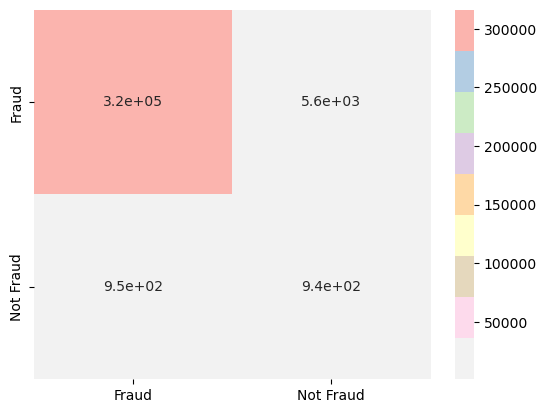

In [145]:
sns.heatmap(logistic_regression_cm, annot=True, cmap='Pastel1_r', xticklabels=['Fraud' ,'Not Fraud'],yticklabels=['Fraud' ,'Not Fraud'])

# Under Sampling

In [146]:
updated_dataset = dataset[['cc_num', 'amt', 'lat', 'city_pop', 'unix_time', 'merchant_enc','category_enc', 'first_enc', 'last_enc', 'gender_enc', 'street_enc', 'city_enc', 'state_enc','job_enc', 'Month','is_fraud']]
fraud = updated_dataset[dataset.is_fraud==1]
not_fraud =  updated_dataset[updated_dataset.is_fraud==0]
sampled_not_fraud = not_fraud.sample(n=fraud.shape[0])            #Sample randomly selects rows and make a dataset
updated_dataset = pd.concat([fraud, sampled_not_fraud])
print(fraud.shape)
updated_dataset.shape

(7504, 16)


(15008, 16)

In [147]:
X_train, X_test, y_train, y_test = train_test_split(updated_dataset[['cc_num', 'amt', 'lat', 'city_pop', 'unix_time', 'merchant_enc',
                            'category_enc', 'first_enc', 'last_enc', 'gender_enc', 'street_enc', 'city_enc', 'state_enc',
                            'job_enc', 'Month']], updated_dataset['is_fraud'], test_size=0.25, random_state=0)

In [148]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_MinMaxscaled = scaler.transform(X_train)
X_train_MinMaxscaled

array([[4.26890153e-05, 4.51577568e-01, 4.93033502e-01, ...,
        1.00000000e+00, 5.39553753e-01, 3.63636364e-01],
       [7.19675818e-04, 3.61872347e-04, 5.32344609e-01, ...,
        4.60000000e-01, 9.12778905e-02, 7.27272727e-01],
       [8.30781416e-04, 9.29131702e-04, 5.16090875e-01, ...,
        4.60000000e-01, 4.40162272e-01, 2.72727273e-01],
       ...,
       [1.02251455e-03, 4.43049117e-02, 4.45770172e-01, ...,
        6.80000000e-01, 3.95537525e-01, 2.72727273e-01],
       [1.20405186e-03, 2.37662109e-03, 3.63040059e-01, ...,
        9.00000000e-01, 3.06288032e-01, 0.00000000e+00],
       [7.14120290e-04, 4.66737085e-01, 4.38312955e-01, ...,
        4.80000000e-01, 5.17241379e-01, 5.45454545e-01]])

In [149]:
scaler = MinMaxScaler()
scaler.fit(X_test)
X_test_MinMaxscaled = scaler.transform(X_test)
X_test_MinMaxscaled

array([[4.26881544e-05, 1.29480597e-02, 4.15169866e-01, ...,
        4.00000000e-01, 6.97768763e-01, 3.63636364e-01],
       [8.33261330e-07, 4.31551045e-01, 4.88473456e-01, ...,
        4.40000000e-01, 3.24543611e-02, 0.00000000e+00],
       [7.48836270e-05, 5.23128358e-02, 2.55043265e-01, ...,
        8.60000000e-01, 6.89655172e-01, 2.72727273e-01],
       ...,
       [9.92885628e-01, 1.62101493e-02, 4.42452996e-01, ...,
        6.20000000e-01, 6.47058824e-01, 5.45454545e-01],
       [7.52277377e-05, 3.55820896e-03, 5.45171880e-01, ...,
        4.60000000e-01, 9.37119675e-01, 9.09090909e-02],
       [1.20409218e-03, 1.41311045e-01, 3.12718841e-01, ...,
        2.00000000e-02, 3.14401623e-01, 9.09090909e-02]])

In [150]:
# KNN Model
knn=KNeighborsClassifier()
knn.fit(X_train_MinMaxscaled, y_train)

KNeighborsClassifier()

In [151]:
y_pred = knn.predict(X_test_MinMaxscaled)

In [152]:
count = 0
for i in range( len(y_test) ):
    if y_pred[i] != y_test.iloc[i]: 
        count = count + 1
error = count/len(y_pred)
print( "Error = %f " % (error*100) + '%' )
knn_accuracy = (1-error)
print( "Accuracy = %f " % (knn_accuracy*100) + '%' )

Error = 20.602345 %
Accuracy = 79.397655 %


In [153]:
knn_cm = confusion_matrix(y_test, y_pred)
print(knn_cm)

[[1426  479]
 [ 294 1553]]


<Axes: >

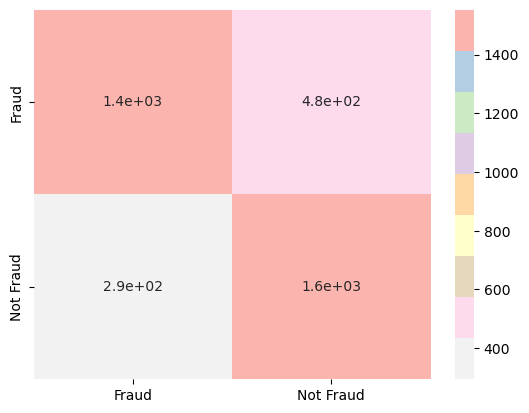

In [154]:
sns.heatmap(knn_cm, annot=True, cmap='Pastel1_r', xticklabels=['Fraud' ,'Not Fraud'],yticklabels=['Fraud' ,'Not Fraud'])

In [155]:
#logistic_regression

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_MinMaxscaled,y_train)

LogisticRegression()

In [156]:
y_pred = logistic_regression.predict(X_test_MinMaxscaled)

In [157]:
count = 0
for i in range( len(y_test) ):
    if y_pred[i] != y_test.iloc[i]: 
        count = count + 1
error = count/len(y_pred)
print( "Error = %f " % (error*100) + '%' )
lr_accuracy = (1-error)
print( "Accuracy = %f " % (lr_accuracy*100) + '%' )

Error = 14.019190 %
Accuracy = 85.980810 %


In [158]:
logistic_regression_cm = confusion_matrix(y_test, y_pred)
print(logistic_regression_cm)

[[1839   66]
 [ 460 1387]]


<Axes: >

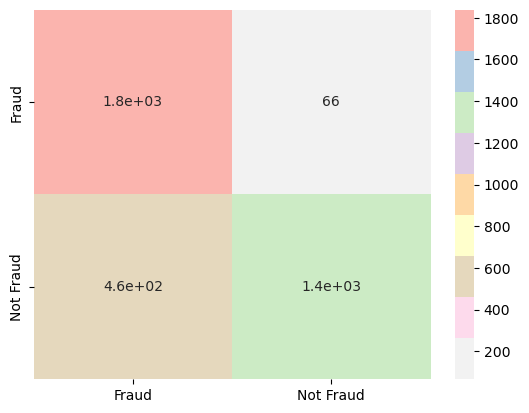

In [159]:
sns.heatmap(logistic_regression_cm, annot=True, cmap='Pastel1_r', xticklabels=['Fraud' ,'Not Fraud'],yticklabels=['Fraud' ,'Not Fraud'])

In [160]:
# Naive Bayes
naive_bayes = GaussianNB()
naive_bayes.fit(X_train_MinMaxscaled, y_train)

GaussianNB()

In [161]:
y_pred = naive_bayes.predict(X_test_MinMaxscaled)

In [162]:
count = 0
for i in range(len(y_test)):
    if y_pred[i] != y_test.iloc[i]: 
        count = count + 1
error = count/len(y_pred)
print( "Error = %f " % (error*100) + '%' )
nb_accuracy = (1-error)
print( "Accuracy = %f " % (nb_accuracy*100) + '%' )

Error = 15.271855 %
Accuracy = 84.728145 %


In [163]:
logistic_regression_cm = confusion_matrix(y_test, y_pred)
print(logistic_regression_cm)

[[1847   58]
 [ 515 1332]]


<Axes: >

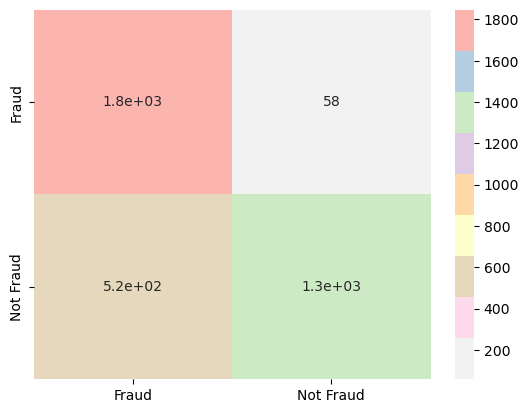

In [164]:
sns.heatmap(logistic_regression_cm, annot=True, cmap='Pastel1_r', xticklabels=['Fraud' ,'Not Fraud'],yticklabels=['Fraud' ,'Not Fraud'])

# Comparison

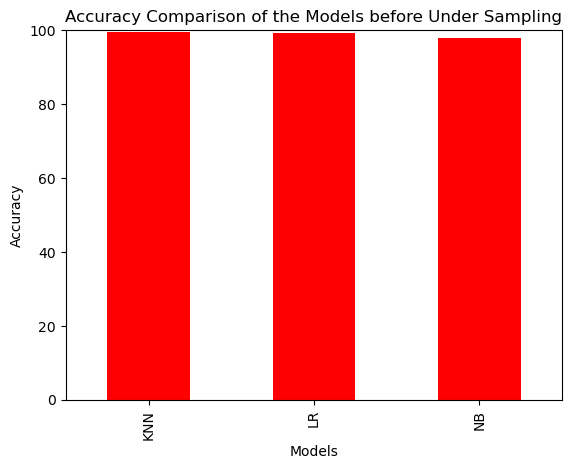

In [165]:
# WithOut Undersampling

accuracy = {'Model': ['KNN', 'LR', 'NB'],
        'Accuracy': [knn_accuracy_withoutUndersample*100, lr_accuracy_withoutundersample*100, nb_accuracy_withoutundersample*100]}
df = pd.DataFrame(accuracy)
ax = df.plot(kind='bar', x='Model', y='Accuracy', color='red', legend=False)
ax.set_ylim([0, 100])
ax.set_title('Accuracy Comparison of the Models before Under Sampling')
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
plt.show()

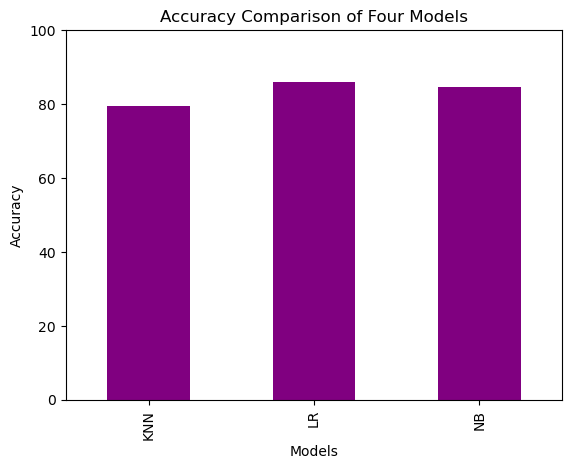

In [166]:
accuracy2 = {'Model': ['KNN', 'LR', 'NB'],
        'Accuracy': [knn_accuracy*100, lr_accuracy*100, nb_accuracy*100]}
df = pd.DataFrame(accuracy2)
ax = df.plot(kind='bar', x='Model', y='Accuracy', color='purple', legend=False)
ax.set_ylim([0, 100])
ax.set_title('Accuracy Comparison of Four Models')
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
plt.show()

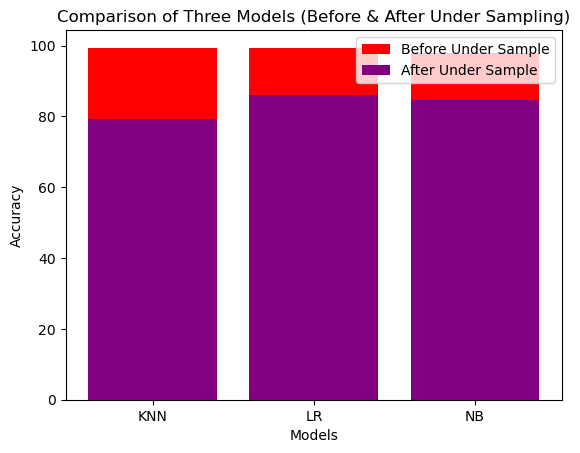

In [168]:
dict1 = {'KNN':knn_accuracy_withoutUndersample*100, 'LR':lr_accuracy_withoutundersample*100, 'NB':nb_accuracy_withoutundersample*100}

dict2 ={'KNN':knn_accuracy*100, 'LR':lr_accuracy*100, 'NB':nb_accuracy*100}

keys = list(dict1.keys())
values_dict1 = list(dict1.values())
values_dict2 = list(dict2.values())

plt.bar(keys, values_dict1, label='Before Under Sample', color='red')
plt.bar(keys, values_dict2, label='After Under Sample', color='purple')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Three Models (Before & After Under Sampling)')
plt.legend()

plt.show()